# Amazon Fine Food Reviews

**Dataset**: **via** **Kaggle**

This dataset consists of reviews of fine foods from amazon.
Reviews include product and user information,ratings,and a plain text review.

Reviews include product and user information,ratings,and a plain text review.It also includes reviews  from all other Amazon categories.


# **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords

from tqdm.notebook import tqdm
from pprint import PrettyPrinter


plt.style.use('ggplot')


# **Read Data**

Before we getting things started,i want to introduce the data dictionary of the dataset.

According to Kaggle:



*   Id: Row Id

*   ProductId: Unique identifier for the product

*   UserId: Unique identifier for the user

*   ProfileName: Profile name of the user

*   HelpfulnessNumerator: Number of users who foundthe review helpful
*   HelpfulnessDenominator: Number of users who indicated whether they found the review helpful or not

*   Score: Rating between 1 and 5

*   Time: Timestamp for the review

*   Summary: Brief summary of the review

*   Text: Text of the review











In [ ]:
df=pd.read_csv('Reviews.csv')
df.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1.303862e+09,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1.346976e+09,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1.219018e+09,"""Delight"" says it all",This is a confection that has been around a fe...


In [ ]:
print('Rows:',df.shape[0])
print('Columns:',df.shape[1])

Rows: 345728
Columns: 10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345728 entries, 0 to 345727
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Id                      345728 non-null  int64  
 1   ProductId               345728 non-null  object 
 2   UserId                  345728 non-null  object 
 3   ProfileName             345711 non-null  object 
 4   HelpfulnessNumerator    345728 non-null  int64  
 5   HelpfulnessDenominator  345728 non-null  int64  
 6   Score                   345728 non-null  int64  
 7   Time                    345727 non-null  float64
 8   Summary                 345713 non-null  object 
 9   Text                    345727 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 26.4+ MB


# **Data Cleaning**

In [ ]:
df.isna().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               17
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       1
Summary                   15
Text                       1
dtype: int64

In [ ]:
df.duplicated().sum()

0

The above results are acceptable cuz' I would not use those column.

# **Exploratory Data Analysis**

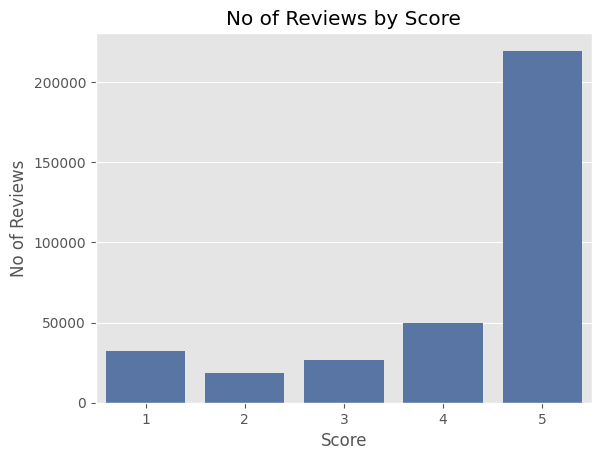

In [ ]:
palette="deep"
sns.set_palette(palette)


sns.countplot(data=df,x='Score')

plt.xlabel('Score')
plt.ylabel('No of Reviews')
plt.title('No of Reviews by Score')

plt.show()

# **Setups for NLTK**

In [ ]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxen_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')
nltk.download('stopwprds')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Error loading maxen_ne_chunker: Package 'maxen_ne_chunker'
[nltk_data]     not found in index
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Error loading stopwprds: Package 'stopwprds' not found in
[nltk_data]     index


False

In [ ]:
import nltk
nltk.download('stopwords')

stop_words=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


 **Cuz I ran the polarity_score calculation for some random 'Text'.The score are affected by stopwords,so I decided to remove them.**

In [ ]:
def remove_stopwords(text):
  if isinstance(text,str): #Check if the text is a string
   words=text.split()
   filtered_words=[word for word in words if word.lower()not in stop_words]
   return ' '.join(filtered_words)
  else:
    return ""

In [ ]:
df.columns=['Id','ProductId','UserId','ProfileName','HelpfulnessNumerator',
       'HelpfulnessDenominator','Score','Time','Summary','RawText']

In [ ]:
df['Text']=df['RawText'].apply(remove_stopwords)

**I will use a test case to see how it works.I pick the entry along with the index 312.**

In [ ]:
test=df['Text'][31201]
test

'first, impressed round little cracker/chip things. novelty wears fast. decided quite gross.'

**Steps:**

1.Lets tokenize it:word_tokenize()

2.Get a tag for each items in the tokens list. Then, represent them as a list of tuple('word','type of word-written in an abbreviation'):pos_tag

3.Visualize list of entities in the tag:ne_chunk()

In [ ]:
import nltk
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.


True

In [ ]:
pip install svgling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 1.2 MB/s eta 0:00:00


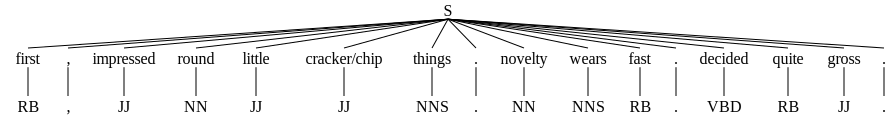

In [ ]:
tokens=nltk.word_tokenize(test)
tags=nltk.pos_tag(tokens)
entities=nltk.ne_chunk(tags)
entities

In [ ]:
pprint(entities)

Pretty printing has been turned ON


# **VADER Sentiment**

In [ ]:
sia=SentimentIntensityAnalyzer()

In [ ]:
pol_list=[]

for text in tqdm(df['Text']):
  pol=sia.polarity_scores(text)
  pol_list.append(pol)

  0%|          | 0/345728 [00:00<?, ?it/s]

In [ ]:
df_pol_score=pd.DataFrame(pol_list)
df_pol_score['Id']=df['Id']
df_pol_score['Score']=df['Score']
df_pol_score['Text']=df['Text']
df_pol_score.head()

,neg,neu,pos,compound,Id,Score,Text
0,0.000,0.517,0.483,0.9413,1,5,bought several Vitality canned dog food produc...
1,0.129,0.762,0.110,-0.1027,2,1,Product arrived labeled Jumbo Salted Peanuts.....
2,0.165,0.560,0.275,0.8073,3,4,"confection around centuries. light, pillowy ci..."
3,0.000,1.000,0.000,0.0000,4,2,looking secret ingredient Robitussin believe f...
4,0.000,0.369,0.631,0.9468,5,5,Great taffy great price. wide assortment yummy...


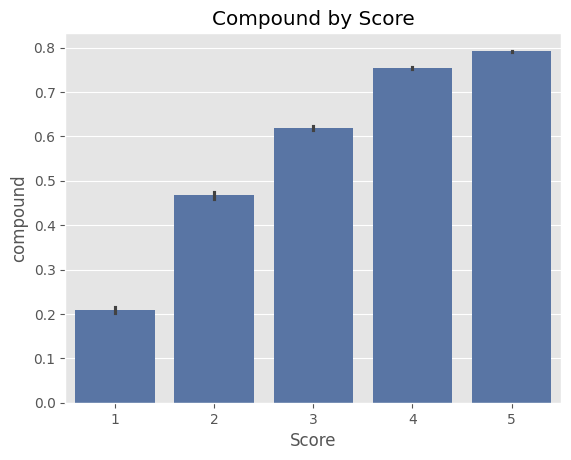

In [ ]:
ax=sns.barplot(data=df_pol_score
               ,x='Score'
               ,y='compound')
ax.set_title('Compound by Score')
plt.show()

**I suppose that the higher rating score corresponds to a higher compound value.**

**Last but not least, I want to check if there is any differentiation in the reviews for each value of 'Score'.**

  0%|          | 0/3 [00:00<?, ?it/s]

<ipython-input-112-73a1e2c5a0d7>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_pol_score
<ipython-input-112-73a1e2c5a0d7>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_pol_score
<ipython-input-112-73a1e2c5a0d7>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_pol_score


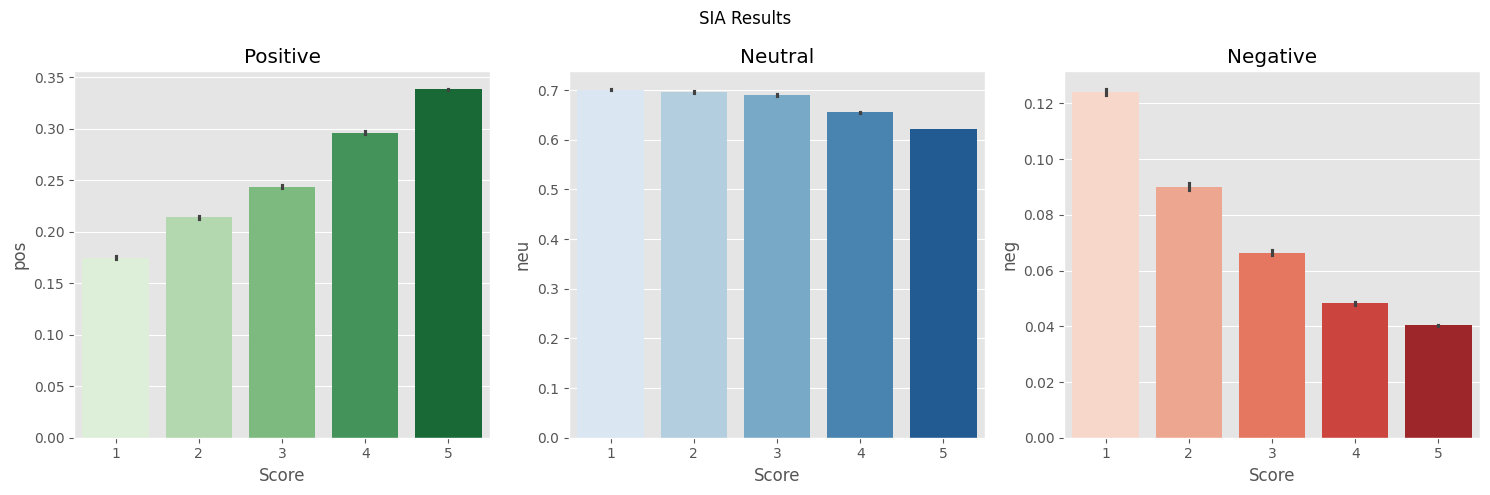

In [ ]:
fig,axes=plt.subplots(1,3,figsize=(15,5))

pol_types= ['pos','neu','neg']
pol_names= ['Positive','Neutral','Negative']
color=['Greens','Blues','Reds']

n=0

for pol_type in tqdm(pol_types):
    sns.barplot(data=df_pol_score
              ,x='Score'
              ,y=pol_type
              ,ax=axes[n]
              ,palette=color[n])
    axes[n].set_title(pol_names[n])
    n+=1

plt.suptitle('SIA Results')

plt.tight_layout()
plt.show()

**To conclude,VADER gave me results as belows:**

1.For Positive polarity score,the highest value comes to Score=5.

2.For Neutral polarity score,the values tend to be relatively consistent.

3.For Negative polarity score,the loweat value comes to Score=1.

# **More EDA after merging VADER into the root dataframe**

In [ ]:
df_merge_vader=df.merge(df_pol_score,how='inner')
df_merge_vader.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,RawText,Text,neg,neu,pos,compound
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1.303862e+09,Good Quality Dog Food,I have bought several of the Vitality canned d...,bought several Vitality canned dog food produc...,0.000,0.517,0.483,0.9413
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1.346976e+09,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Product arrived labeled Jumbo Salted Peanuts.....,0.129,0.762,0.110,-0.1027


In [ ]:
df_merge_vader.loc[df_merge_vader['compound']>=0.5,'VaderSegment']='Positive'
df_merge_vader.loc[df_merge_vader['compound']<=-0.5,'VaderSegment']='Negative'
df_merge_vader.loc[(df_merge_vader['compound']<0.5)&(df_merge_vader['compound']>=-0.5),'VaderSegment']='Neutral'

In [ ]:
df_merge_vader['Date']= pd.to_datetime(df_merge_vader['Time'],unit='s')
df_merge_vader['Month']=df_merge_vader['Date'].dt.month
df_merge_vader['Year']= df_merge_vader['Date'].dt.year
df_merge_vader.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,RawText,Text,neg,neu,pos,compound,VaderSegment,Date,Month,Year
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1.303862e+09,Good Quality Dog Food,I have bought several of the Vitality canned d...,bought several Vitality canned dog food produc...,0.000,0.517,0.483,0.9413,Positive,2011-04-27,4.0,2011.0
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1.346976e+09,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Product arrived labeled Jumbo Salted Peanuts.....,0.129,0.762,0.110,-0.1027,Neutral,2012-09-07,9.0,2012.0


  0%|          | 0/3 [00:00<?, ?it/s]

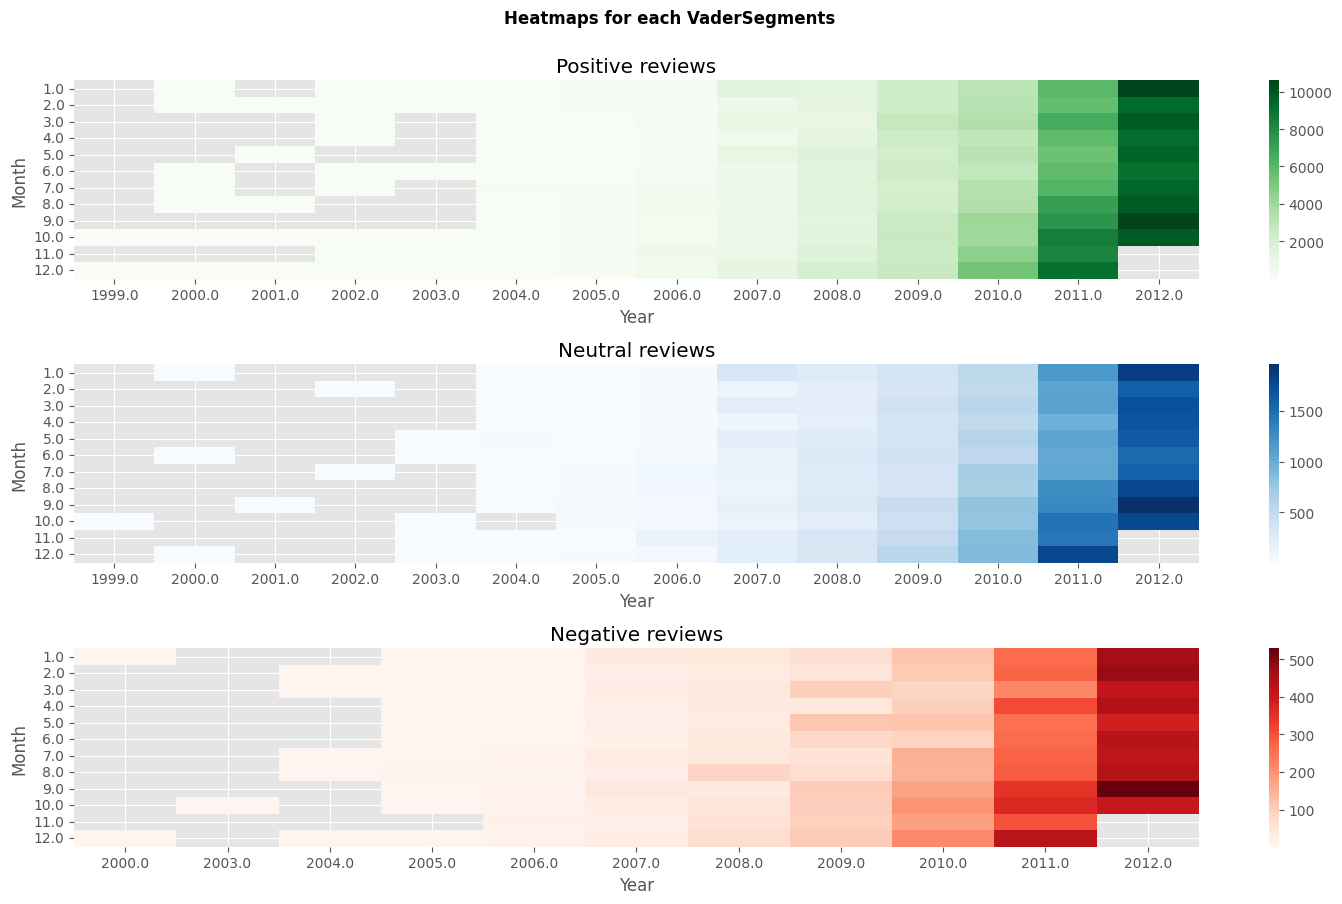

In [ ]:
fig,axes=plt.subplots(3,1,figsize=(15,9))

plt.suptitle('Heatmaps for each VaderSegments'
             ,x=0.45
             ,y=1
             ,fontweight='bold' #Changed fontsize to fontweight
             )
segment_list=['Positive','Neutral','Negative']
cmap_list=['Greens','Blues','Reds']
name_list=['Positive reviews','Neutral reviews','Negative reviews']

n=0

for segment in tqdm(segment_list):
    df_vader_piv=df_merge_vader[df_merge_vader['VaderSegment']==segment]\
                .pivot_table(values='Id', #Removed extra indent
                             index='Month',
                             columns='Year',
                             aggfunc='count')

    sns.heatmap(df_vader_piv
                ,cmap=cmap_list[n]
                ,ax=axes[n])

    axes[n].set_xticklabels(axes[n].get_xticklabels(),rotation=0) #Changes axes[n],to axes[n].
    axes[n].set_yticklabels(axes[n].get_yticklabels(),rotation=0)
    axes[n].set_title(name_list[n])
    n+=1

plt.tight_layout()
plt.show()



<ipython-input-136-c43adfd78b22>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_vader_count


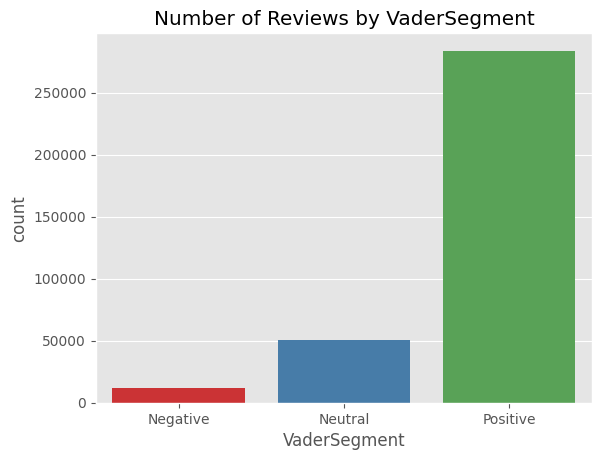

In [ ]:
df_vader_count=df_merge_vader.groupby(by='VaderSegment').agg(count=('Id','count')).reset_index()
sns.barplot(data=df_vader_count
            ,x='VaderSegment'
            ,y='count'
            ,palette='Set1')
plt.title('Number of Reviews by VaderSegment')
plt.show()

<ipython-input-140-8809130f4935>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_contributor


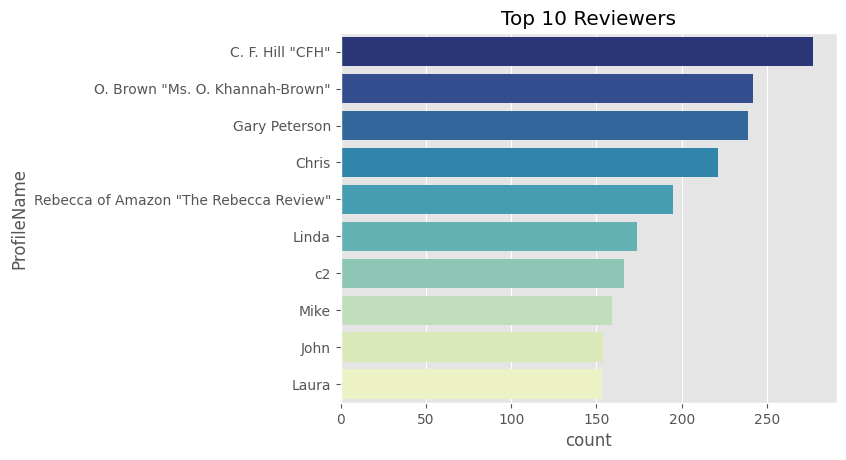

In [ ]:
top_contributor=df_merge_vader\
                .groupby(by='ProfileName').agg(count=('Id','count'))\
                .reset_index()\
                .sort_values(by='count',ascending=False).head(10) #Removed extra indent

sns.barplot(data=top_contributor
            ,x='count'
            ,y='ProfileName'
            ,palette='YlGnBu_r')
plt.title('Top 10 Reviewers')
plt.show()

 **They are top 10 reviewers who wrote the most number of reviews on the platform.**

**I think Amazon should honor them with "The reward for the highest valuable customers"**

<ipython-input-141-2312e22805cf>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grumpy_customer


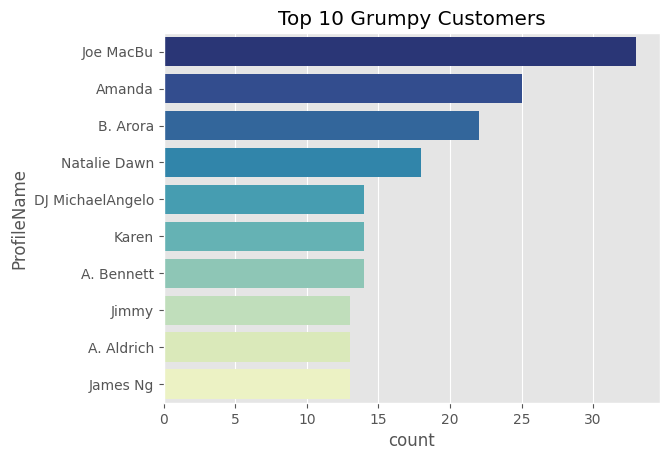

In [ ]:
grumpy_customer=df_merge_vader[df_merge_vader['VaderSegment']=='Negative']\
                .groupby(by='ProfileName').agg(count=('Id','count'))\
                .reset_index()\
                .sort_values(by='count',ascending=False).head(10)

sns.barplot(data=grumpy_customer
            ,x='count'
            ,y='ProfileName'
            ,palette='YlGnBu_r')
plt.title('Top 10 Grumpy Customers')
plt.show()

**They are top 10 grumpy customers who wrote the most number of negative reviews on the platform.**

**CX's Amazon team should take care of them and ask the customer for more details about the issue.**

**Gathering additional information can help the platform better understand the problem and how to fix it.**

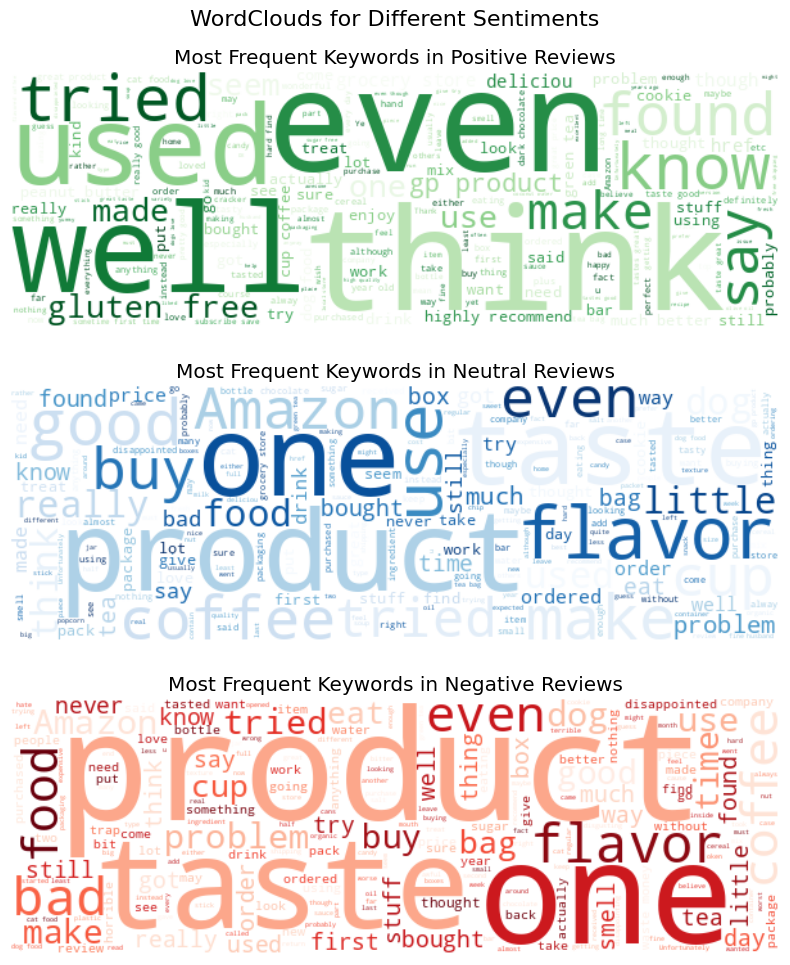

In [ ]:
!pip install wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud # Import the wordcloud module


vader_type=['Positive','Neutral','Negative']
cmap_list=['Greens','Blues','Reds']

fig,axes=plt.subplots(3,1,figsize=(8,10))

for n,sentiment in enumerate(vader_type):
    text="".join(review.strip()for review in df_merge_vader[df_merge_vader['VaderSegment']==sentiment]['Text']
                 .str.replace('br','')\
                 .str.replace('Br','')\
                 )

    wc=WordCloud(width=600,height=200,background_color='white',colormap=cmap_list[n]).generate(text) #Changed colormap_name to colormap

    axes[n].imshow(wc,interpolation='bilinear')
    axes[n].set_title(f'Most Frequent Keywords in {sentiment} Reviews')
    axes[n].axis('off')

plt.suptitle('WordClouds for Different Sentiments',fontsize=16)
plt.tight_layout()
plt.show()

**These Wordclouds showed the most frequently occuring words in each type of review.**